### Algo

#### rotation chipher

In [9]:
def rotationalCipher(input, rotation_factor):
    # Check if the both parameters exists
    if not input or not rotation_factor:
        return input
    
    # Create two lists for capital and small alphabets
    cap_alpha = [chr(c) for c in range(ord("A"), ord("Z")+1)]
    alpha = [chr(c) for c in range(ord("a"), ord("z")+1)]
    #print(len(cap_alpha))
    # Initiate an empty list
    res = []
    
    # for loop to check all the characters in input
    for c in input:
        # if charater is not alpha or number
        if not c.isalnum():
            res.append(c)
        # if its an alphabet
        elif c.isalpha():
            # if for upper case
            if c.isupper():
                idx = cap_alpha.index(c) + rotation_factor
            # there are 26 alphabets in english so if it increases above 25
            # starting from 0 remainder will point towards the next alphabet after rotation
                if idx > 25:
                    idx %= 26
                res.append(cap_alpha[idx])
            
            # if the character is lower case
            else:
                idx = alpha.index(c) + rotation_factor
                if idx > 25:
                    idx %= 26
                res.append(alpha[idx])
        # if the character is a digit
        elif c.isdigit():
            res.append(str(int(c) + rotation_factor)[-1])
    return "".join(res)
            

In [10]:
rotationalCipher('Zebra-493?', 3)

'Cheud-726?'

In [5]:
obj = Solution()

#### inorder successor
    The inorder successor of a particular node is simply the node that comes after this node during the inorder traversal of the tree.

#### binary search algorithm

In [23]:
def binary_search(target, arr):
    low = 0
    high = len(arr)-1
    while low <= high:
        median = (low+high) // 2 # Floored division
        if arr[median] < target:
            low = median + 1
        else:
            high = median - 1
        
        if (low != len(arr)) and (arr[low] == target):
            return True
    return False

In [31]:
binary_search(19, [i for i in range(20)])

True

In [30]:
[i for i in range(20)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

#### longest contiguous array of 1's and 0's

In [34]:
# replace zero with -1
# if the add = 0 or 
# it repeats the value in dictionary 
# then we have a sub array of pairs of 0's and 1's

def findMaxLength(arr):
    d = {}
    add = l_arr = 0
    
    for i in range(len(arr)):
        if arr[i] == 1:
            add += 1
        else:
            add += -1 # add -1 instead of 0
        
        if add == 0:
            if l_arr < i+1:
                l_arr = i+1
        elif add in d:
            if l_arr < i - d[add]:
                l_arr = i - d[add]
        else:
            d[add] = i
    return l_arr

In [43]:
z = [1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0]
findMaxLength(z)

26

In [44]:
len(z)

28

In [46]:
"1101".split("0")

['11', '1']

#### Contiguous array

##### You are given an array arr of N integers. For each index i, you are required to determine the number of contiguous subarrays that fulfill the following conditions:
    The value at index i must be the maximum element in the contiguous subarrays, and
    These contiguous subarrays must either start from or end on index i.
    Signature
    int[] countSubarrays(int[] arr)
    Input
    Array arr is a non-empty list of unique integers that range between 1 to 1,000,000,000
    Size N is between 1 and 1,000,000
    Output
    An array where each index i contains an integer denoting the maximum number of contiguous subarrays of arr[i]
    Example:
    arr = [3, 4, 1, 6, 2]
    output = [1, 3, 1, 5, 1]
    Explanation:
    For index 0 - [3] is the only contiguous subarray that starts (or ends) with 3, and the maximum value in this subarray is 3.
    For index 1 - [4], [3, 4], [4, 1]
    For index 2 - [1]
    For index 3 - [6], [6, 2], [1, 6], [4, 1, 6], [3, 4, 1, 6]
    For index 4 - [2]
    So, the answer for the above input is [1, 3, 1, 5, 1]

In [54]:
def count_subarrays(arr):
    
    res = []
    # Write your code here  
    for i, n in enumerate(arr):
        
        # every index is a list in itself of len() = 1
        count = 0
        
        # index to right
        x = i
        while x < len(arr)-1:
            if n > arr[x+1]:
                count +=1
                x +=1
            else:
                x = len(arr)
            
        x = i
        # index to left
        while x > 0:
            if n > arr[x-1]:
                count +=1
                x -=1
            else:
                x=-1
            
        
        res.append(count+1)
    return res

In [55]:
arr = [3, 4, 1, 6, 2]
count_subarrays(arr)

[1, 3, 1, 5, 1]

In [81]:
[i for i in range(0,5)]

[0, 1, 2, 3, 4]

In [69]:
[i for i in range(0,-1,-1)]

[0]

#### Pair sums
    Given a list of n integers arr[0..(n-1)], determine the number of different pairs of elements within it which sum to k.
    If an integer appears in the list multiple times, each copy is considered to be different; that is, two pairs are considered different if one pair includes at least one array index which the other doesn't, even if they include the same values.
    Signature
    int numberOfWays(int[] arr, int k)
    Input
    n is in the range [1, 100,000].
    Each value arr[i] is in the range [1, 1,000,000,000].
    k is in the range [1, 1,000,000,000].
    Output
    Return the number of different pairs of elements which sum to k.
    Example 1
    n = 5
    k = 6
    arr = [1, 2, 3, 4, 3]
    output = 2
    The valid pairs are 2+4 and 3+3.
    Example 2
    n = 5
    k = 6
    arr = [1, 5, 3, 3, 3]
    output = 4
    There's one valid pair 1+5, and three different valid pairs 3+3 (the 3rd and 4th elements, 3rd and 5th elements, and 4th and 5th elements)

In [102]:
def numberOfWays(arr, k):
    count = 0
    # Write your code here
    for i, n in enumerate(arr):
        x = i
        while x < len(arr)-1:
            if n + arr[x+1] == k:
                count +=1
            x +=1
    return count


In [104]:
arr = arr = [1, 5, 3, 3, 3]
k = 6
numberOfWays(arr, k)

4

In [105]:
arr = [1, 2, 3, 4, 3]
k = 6

numberOfWays(arr, k)

2

In [106]:
l = [i for i in range(0,5)]

In [109]:
l

[0, 1, 2, 3, 4]

In [114]:
l[:-1]

[0, 1, 2, 3]

In [117]:
def are_they_equal(array_a, array_b):
  # Write your code here
  if sorted(array_a) == sorted(array_b):
    return True
  else:
    return False

In [118]:
a_1 = [1, 2, 3, 4]
b_1 = [1, 4, 3, 2]
are_they_equal(a_1, b_1)

True

In [120]:
a_1 == b_1

False

In [119]:
a_2 = [1, 2, 3, 4]
b_2 = [1, 2, 3, 5]  
are_they_equal(a_2, b_2)

False

In [121]:
a_2 == b_2

False

#### Sliding window

In [35]:
# longest non-repeating substring
def substring(s) -> int:
    charSet = set()
    l = 0
    res = 0
    
    for r in range(len(s)):
        while s[r] in charSet:
            charSet.remove(s[l])
            l +=1
        charSet.add(s[r])
        res = max(res, r-l +1)
    return res
substring("aaabbsawefbbs")

6

In [ ]:
# smallest substring with all characters

def minWindow(s: str, t: str) -> str:
    

In [ ]:
def letterCombinations(self, digits: str) -> List[str]:
        lookup = {
            "2": ["a", "b", "c"],
            "3": ["d", "e", "f"],
            "4": ["g", "h", "i"],
            "5": ["j", "k", "l"],
            "6": ["m", "n", "o"],
            "7": ["p", "q", "r", "s"],
            "8": ["t", "u", "v"],
            "9": ["w", "x", "y", "z"]
        }
        
        letter_lists = []
        for ch in digits:
            letter_lists.append(lookup[ch])
            
        while len(letter_lists) > 1:
            l1 = letter_lists.pop()
            l2 = letter_lists.pop()
            combos = []
            for i in l1:
                for j in l2:
                    combos.append(j + i)
            letter_lists.append(combos)
        #print(letter_lists)
        return [] if not letter_lists else letter_lists[0]

In [1]:
fruits = ['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']

In [4]:
fruits.index('banana', 4)

6

In [5]:
fruits.count('banana')

2

#### Valid Parentheses
    Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

    An input string is valid if:

    Open brackets must be closed by the same type of brackets.
    Open brackets must be closed in the correct order.


In [ ]:
def isValid(s: str) -> bool:
        while "()" in s or "[]" in s or "{}" in s:
            s=s.replace("()","").replace("[]","").replace("{}","")
        return s==''

def isValid(s: str) -> bool:
        stack=[]
        dct={"}":"{","]":"[",")":"("}
        
        for i in s:
            # look for only the closing brackes in dct keys
            if i in dct:
                if stack and stack[-1]==dct[i]:
                    stack.pop()
                else:
                    # more closing brackets exist in stack
                    return False
            else:
                # appending the stack
                stack.append(i)
        return stack==[]

### Linked list

#### Floyd’s Cycle Detection Algorithm

In [7]:
class ListNode:
    def __init__(self, x):    
        self.val = x
        self.next = None

In [8]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

def hasCycle(self, head: ListNode) -> bool:
        if head is None:
            return False
        slow = head
        fast = head.next
        while slow != fast:
            if fast is None or fast.next is None:
                return False
            slow = slow.next
            fast = fast.next.next
        return True

In [9]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getIntersect(self, head):
        tortoise = head
        hare = head

        # A fast pointer will either loop around a cycle and meet the slow
        # pointer or reach the `null` at the end of a non-cyclic list.
        while hare is not None and hare.next is not None:
            tortoise = tortoise.next
            hare = hare.next.next
            if tortoise == hare:
                return tortoise

        return None

    def detectCycle(self, head):
        if head is None:
            return None

        # If there is a cycle, the fast/slow pointers will intersect at some
        # node. Otherwise, there is no cycle, so we cannot find an entrance to
        # a cycle.
        intersect = self.getIntersect(head)
        if intersect is None:
            return None

        # To find the entrance to the cycle, we have two pointers traverse at
        # the same speed -- one from the front of the list, and the other from
        # the point of intersection.
        ptr1 = head
        ptr2 = intersect
        while ptr1 != ptr2:
            ptr1 = ptr1.next
            ptr2 = ptr2.next

        return ptr1


In [14]:
def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        length = 0
        node = head
        
        while node != None:
            node = node.next
            length +=1
            
        if length == n:
            return head.next
        
        nBefore = length - n -1
        node = head
        
        for i in range (nBefore):
            node = node.next
        
        # node.next updates the address pointer
        node.next = node.next.next
        
        return head

In [15]:
def reversellist(head: ListNode):
    prev = None
    cur = head
    
    while cur:
        n = cur.next
        cur.next = prev
        prev = cur
        cur = n
        
    return head

In [16]:
def removeElements(self, head: ListNode, val: int) -> ListNode:
        sentinel = ListNode(0)
        sentinel.next = head
        
        prev, curr = sentinel, head
        while curr:
            if curr.val == val:
                prev.next = curr.next
            else:
                prev = curr
            curr = curr.next
        
        return sentinel.next

In [18]:
def oddEvenList(self, head: ListNode) -> ListNode:
        if head is None:
             return None
        odd = head
        even = head.next
        evenHead = even
        
        while even != None and even.next != None:
            odd.next = even.next
            odd = odd.next
            even.next = odd.next
            even = even.next
            
        odd.next = evenHead
        return head

In [19]:
def isPalindrome(self, head: ListNode) -> bool:
        vals = []
        current_node = head
        while current_node is not None:
            vals.append(current_node.val)
            current_node = current_node.next
        return vals == vals[::-1]

#### double linked list

In [20]:
def mergeTwoLists(self, l1, l2):
        # maintain an unchanging reference to node ahead of the return node.
        prehead = ListNode(-1)

        prev = prehead
        while l1 and l2:
            if l1.val <= l2.val:
                prev.next = l1
                l1 = l1.next
            else:
                prev.next = l2
                l2 = l2.next            
            prev = prev.next

        # At least one of l1 and l2 can still have nodes at this point, so connect
        # the non-null list to the end of the merged list.
        prev.next = l1 if l1 is not None else l2

        return prehead.next

In [21]:
# Merge Two Sorted Lists by recursion
def mergeTwoLists(self, l1, l2):
        if l1 is None:
            return l2
        elif l2 is None:
            return l1
        elif l1.val < l2.val:
            l1.next = self.mergeTwoLists(l1.next, l2)
            return l1
        else:
            l2.next = self.mergeTwoLists(l1, l2.next)
            return l2
        

#### Stack and queue

Given an array of integers temperatures represents the daily temperatures, return an array answer such that answer[i] is the number of days you have to wait after the ith day to get a warmer temperature. If there is no future day for which this is possible, keep answer[i] == 0 instead.

 

Example 1:

Input: temperatures = [73,74,75,71,69,72,76,73]

Output: [1,1,4,2,1,1,0,0]


In [ ]:
class Solution:
    def dailyTemperatures(self, T):
        ans = [0] * len(T)
        stack = []
        for i, t in enumerate(T):
            while stack and T[stack[-1]] < t:
                cur = stack.pop()
                ans[cur] = i - cur
            stack.append(i)
            print(i," -------------")
        return ans


Evaluate the value of an arithmetic expression in Reverse Polish Notation.

Valid operators are +, -, *, and /. Each operand may be an integer or another expression.

Note that division between two integers should truncate toward zero.

It is guaranteed that the given RPN expression is always valid. That means the expression would always evaluate to a result, and there will not be any division by zero operation.

In [ ]:
def evalRPN(self, tokens: List[str]) -> int:

        operations = {
            "+": lambda a, b: a + b,
            "-": lambda a, b: a - b,
            "/": lambda a, b: int(a / b),
            "*": lambda a, b: a * b
        }
        
        current_position = 0
        
        while len(tokens) > 1:
            
            # Move the current position pointer to the next operator.
            while tokens[current_position] not in "+-*/":
                current_position += 1
        
            # Extract the operator and numbers from the list.
            operator = tokens[current_position]
            number_1 = int(tokens[current_position - 2])
            number_2 = int(tokens[current_position - 1])
            
            # Calculate the result to overwrite the operator with.
            operation = operations[operator]
            tokens[current_position] = operation(number_1, number_2)
            
            # Remove the numbers and move the pointer to the position
            # after the new number we just added.
            tokens.pop(current_position - 2)
            tokens.pop(current_position - 2)
            current_position -= 1
        
        return tokens[0]


### Binary tree algorithms

#### Binary search tree

In [1]:
class TreeNode:
    
    def __init__(self, x):
        
        self.val = x
        self.left = None
        self.right = None
# check if the tree is a valid BST
import math
class Solution:
    def isValidBST(self, root : TreeNode) -> bool:
        def validate(node, low = -math.inf, high = math.inf):
            # Empty trees are valid BST
            if not node:
                return True
            # The current node's value must be between low and high
            if node.val <= low or node.val >= high:
                return False
            
            # The left and right subtree must also be valid:
            return (validate(node.left, low, node.val) and validate(node.right, node.val, high))
        
        return validate(root)

In [6]:
# define the node class

class TreeNode:
    def __init__(self, x):    
        self.data = x
        self.left = None
        self.right = None

#### depth of tree

In [ ]:
def topBottommaxDepth(root: TreeNode) -> int:
    #res = 0
    if root == None:
        return 0
    left = maxDepth(root.left)
    right = maxDepth(root.right)

    return max(left, right) + 1

#### symmetric trees are mirror images of the left and right 

In [16]:
def isSymmetric(self, root: TreeNode) -> bool:
    
    def isMirror(t1: TreeNode, t2: TreeNode):
        
        if t1 == None and t2 == None:
            return True
        if t1 == None or t2 == None:
            return False
        return t1.val == t2.val and isMirror(t1.right, t2.left) and isMirror(t1.left, t2.right)
    return isMirror(root, root)

#### Given the root of a binary tree and an integer targetSum,
#### return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum

In [ ]:
def hasPathSum(self, root, sum):
    if not root:
        return False

    sum -= root.val
    if not root.left and not root.right:  # if reach a leaf
        return sum == 0
    return self.hasPathSum(root.left, sum) or self.hasPathSum(root.right, sum)

In [ ]:
res = 0
def bottomUPmaxDepth(root: TreeNode, depth: int) -> int:
    
    if root == None:
        return 0
    if root.left == None and root.right == None:
        res = max(res, depth)
    bottomUPmaxDepth(root.left, depth+1)
    bottomUPmaxDepth(root.right, depth+1)
    return res

#### BFS breadth first search ---- we use queue
##### Level order traversal

#### DFS depth first search ---- we use stack
##### pre-order traversal, in-order traversal and post-order traversal

In [7]:
# Level order traversal
def levelOrder(self, root: TreeNode) -> [int]:
        if root == None:
            return []
        op_list = []
        queue = [root] # contains all nodes
        
        while queue:
            level_len = len(queue)
            #print(len(queue))
            temp_list = [] # temporary list to store all the level nodes
            for i in range(level_len):
                node = queue.pop(0) # remove nodes from left
                temp_list.append(node.val) # append node value for each level
                # keeps a check on the next level nodes
                if node.left:
                    queue.append(node.left) # append que to check for children
                if node.right:
                    queue.append(node.right)
            op_list.append(temp_list)
        return op_list

In [9]:
# Python program to for tree traversals
 
# A class that represents an individual node in a
# Binary Tree
 

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
 
 
# A function to do inorder tree traversal
def printInorder(root):
 
    if root:
 
        # First recur on left child
        printInorder(root.left)
 
        # then print the data of node
        print(root.val),
 
        # now recur on right child
        printInorder(root.right)
 
 
# A function to do postorder tree traversal
def printPostorder(root):
 
    if root:
 
        # First recur on left child
        printPostorder(root.left)
 
        # the recur on right child
        printPostorder(root.right)
 
        # now print the data of node
        print(root.val),
 
 
# A function to do preorder tree traversal
def printPreorder(root):
 
    if root:
 
        # First print the data of node
        print(root.val),
 
        # Then recur on left child
        printPreorder(root.left)
 
        # Finally recur on right child
        printPreorder(root.right)
 
 
# Driver code

#### construct tree from pre and in-order traversals

In [ ]:
# preorder and inorder
def buildTree(preorder: list, inorder: list) -> TreeNode:
    if not preorder or not inorder:
        return None
    root = TreeNode(preorder[0])
    mid = inorder.index(preorder[0])
    root.left = buildTree(preorder[1:mid+1], inorder[:mid])
    root.right = buildTree(preorder[mid+1:], inorder[mid:1:])
    return root

In [ ]:
# postorder and inorder
def buildTree(postorder: list, inorder: list) -> TreeNode:
    if not postorder or not inorder:
        return None
    root = TreeNode(postorder[-1])
    mid = inorder.index(postorder[-1])
    root.left = buildTree(postorder[1:mid+1], inorder[:mid])
    root.right = buildTree(postorder[mid+1:], inorder[mid:1:])
    return root

#### flatten the tree

In [ ]:
def flattenTree(self, node):
        
        # Handle the null scenario
        if not node:
            return None
        
        # For a leaf node, we simply return the
        # node as is.
        if not node.left and not node.right:
            return node
        
        # Recursively flatten the left subtree
        leftTail = self.flattenTree(node.left)
        
        # Recursively flatten the right subtree
        rightTail = self.flattenTree(node.right)
        
        # If there was a left subtree, we shuffle the connections
        # around so that there is nothing on the left side
        # anymore.
        if leftTail:
            leftTail.right = node.right
            node.right = node.left
            node.left = None
        
        # We need to return the "rightmost" node after we are
        # done wiring the new connections. 
        return rightTail if rightTail else leftTail
    
def flatten(self, root: TreeNode) -> None:
    """
    Do not return anything, modify root in-place instead.
    """

    self.flattenTree(root)

In [ ]:
# max path sum in tree
def maxPathSum(self, root: Optional[TreeNode]) -> int:
        
        def maxSum(root):
            if not root:
                return 0
            l_sum = maxSum(root.left)
            r_sum = maxSum(root.right)
            l = max(0, l_sum)
            r = max(0, r_sum)
            res[0] = max(res[0], root.val + l + r)
            return root.val + max(l, r)
        
        res = [-float('inf')]
        maxSum(root)
        #print(type(res[0]))
        return res[0]

### Heap

In [ ]:
#   Kth Largest Element in an Array
def findKthLargest(nums: List[int], k: int) -> int:
        return heapq.nlargest(k, nums)[-1]


In [ ]:
# Top K Frequent Elements
def topKFrequent(self, nums: List[int], k: int) -> List[int]: 
        # O(1) time 
        if k == len(nums):
            return nums
        
        # 1. build hash map : character and how often it appears
        # O(N) time
        count = Counter(nums)   
        # 2-3. build heap of top k frequent elements and
        # convert it into an output array
        # O(N log k) time
        return heapq.nlargest(k, count.keys(), key=count.get) 

In [ ]:
#   Kth Largest Element in a Stream

class KthLargest:
    def __init__(self, k: int, nums: List[int]):
        self.k = k
        self.heap = nums
        heapq.heapify(self.heap)
        
        while len(self.heap) > k:
            heapq.heappop(self.heap)

    def add(self, val: int) -> int:
        heapq.heappush(self.heap, val)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
        return self.heap[0]

#### Last Stone Weight
    You are given an array of integers stones where stones[i] is the weight of the ith stone.

    We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. The result of this smash is:

    If x == y, both stones are destroyed, and
    If x != y, the stone of weight x is destroyed, and the stone of weight y has new weight y - x.
    At the end of the game, there is at most one stone left.

In [ ]:
def lastStoneWeight(stones: List[int]) -> int:

        # Make all the stones negative. We want to do this *in place*, to keep the
        # space complexity of this algorithm at O(1). :-)
        for i in range(len(stones)):
            stones[i] *= -1

        # Heapify all the stones.
        heapq.heapify(stones)

        # While there is more than one stone left, remove the two
        # largest, smash them together, and insert the result
        # back into the heap if it is non-zero.
        while len(stones) > 1:
            stone_1 = heapq.heappop(stones)
            stone_2 = heapq.heappop(stones)
            if stone_1 != stone_2:
                heapq.heappush(stones, stone_1 - stone_2)

        # Check if there is a stone left to return. Convert it back
        # to positive.
        return -heapq.heappop(stones) if stones else 0

#### The K Weakest Rows in a Matrix
    [[1,1,0,0,0],
     [1,1,1,1,0],
     [1,0,0,0,0],
     [1,1,0,0,0],
     [1,1,1,1,1]], 

In [ ]:
def kWeakestRows(self, mat: List[List[int]], k: int) -> List[int]:
        heap = [] #maxheap
        heapq.heapify(heap)
        
        
        for i in range(len(mat)):
            val = sum(mat[i])
            heapq.heappush(heap,(val,i))
            print(heap)
        #print(heap)
        ans = []
        for i in range(k):
            val = heapq.heappop(heap)
            ans.append(val[1])
            
        return ans

### Graphs

In [1]:
# UnionFind class for quick find operation
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]

    def find(self, x):
        return self.root[x] # O(1)

    def union(self, x, y): # O(N)
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            for i in range(len(self.root)):
                if self.root[i] == rootY: # in case of union
                    self.root[i] = rootX  # element at i-th place is replaced by the new assigned root value

    def connected(self, x, y):
        return self.find(x) == self.find(y)

In [ ]:
# UnionFind class for quick union operation
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)


In [ ]:
# UnionFind class for union by rank operation
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x
		
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

In [ ]:
# UnionFind class with Path Compression and Union by Rank
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        # Use a rank array to record the height of each vertex, i.e., the "rank" of each vertex.
        # The initial "rank" of each vertex is 1, because each of them is
        # a standalone vertex with no connection to other vertices.
        self.rank = [1] * size

    # The find function here is the same as that in the disjoint set with path compression.
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    # The union function with union by rank
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)



In [ ]:
# All Paths From Source to Target recurssion solution

def allPathsSourceTarget(graph: List[List[int]]) -> List[List[int]]:

    target = len(graph) - 1
    results = []

    def backtrack(currNode, path):
        # if we reach the target, no need to explore further.
        if currNode == target:
            results.append(list(path))
            return
        # explore the neighbor nodes one after another.
        for nextNode in graph[currNode]:
            path.append(nextNode)
            backtrack(nextNode, path)
            path.pop()
    # kick of the backtracking, starting from the source node (0).
    path = deque([0])
    backtrack(0, path)

    return results

#### depth first search

In [ ]:
# All Paths From Source to Target DFS solution

def allPathsSourcetoTarget(self, graph: List[List[int]]) -> List[List[int]]:
        def dfs(node):
            path.append(node)
            if node == len(graph) - 1:
                paths.append(path.copy())
                return

            next_nodes = graph[node]
            for next_node in next_nodes:
                dfs(next_node)
                path.pop()

        paths = []
        path = []
        if not graph or len(graph) == 0:
            return paths
        dfs(0)
        return paths

#### Clone graph
##### graph is undirected and each list contains the adjacent nodes/ vertices 
##### input format adjList = [[2,4],[1,3],[2,4],[1,3]]

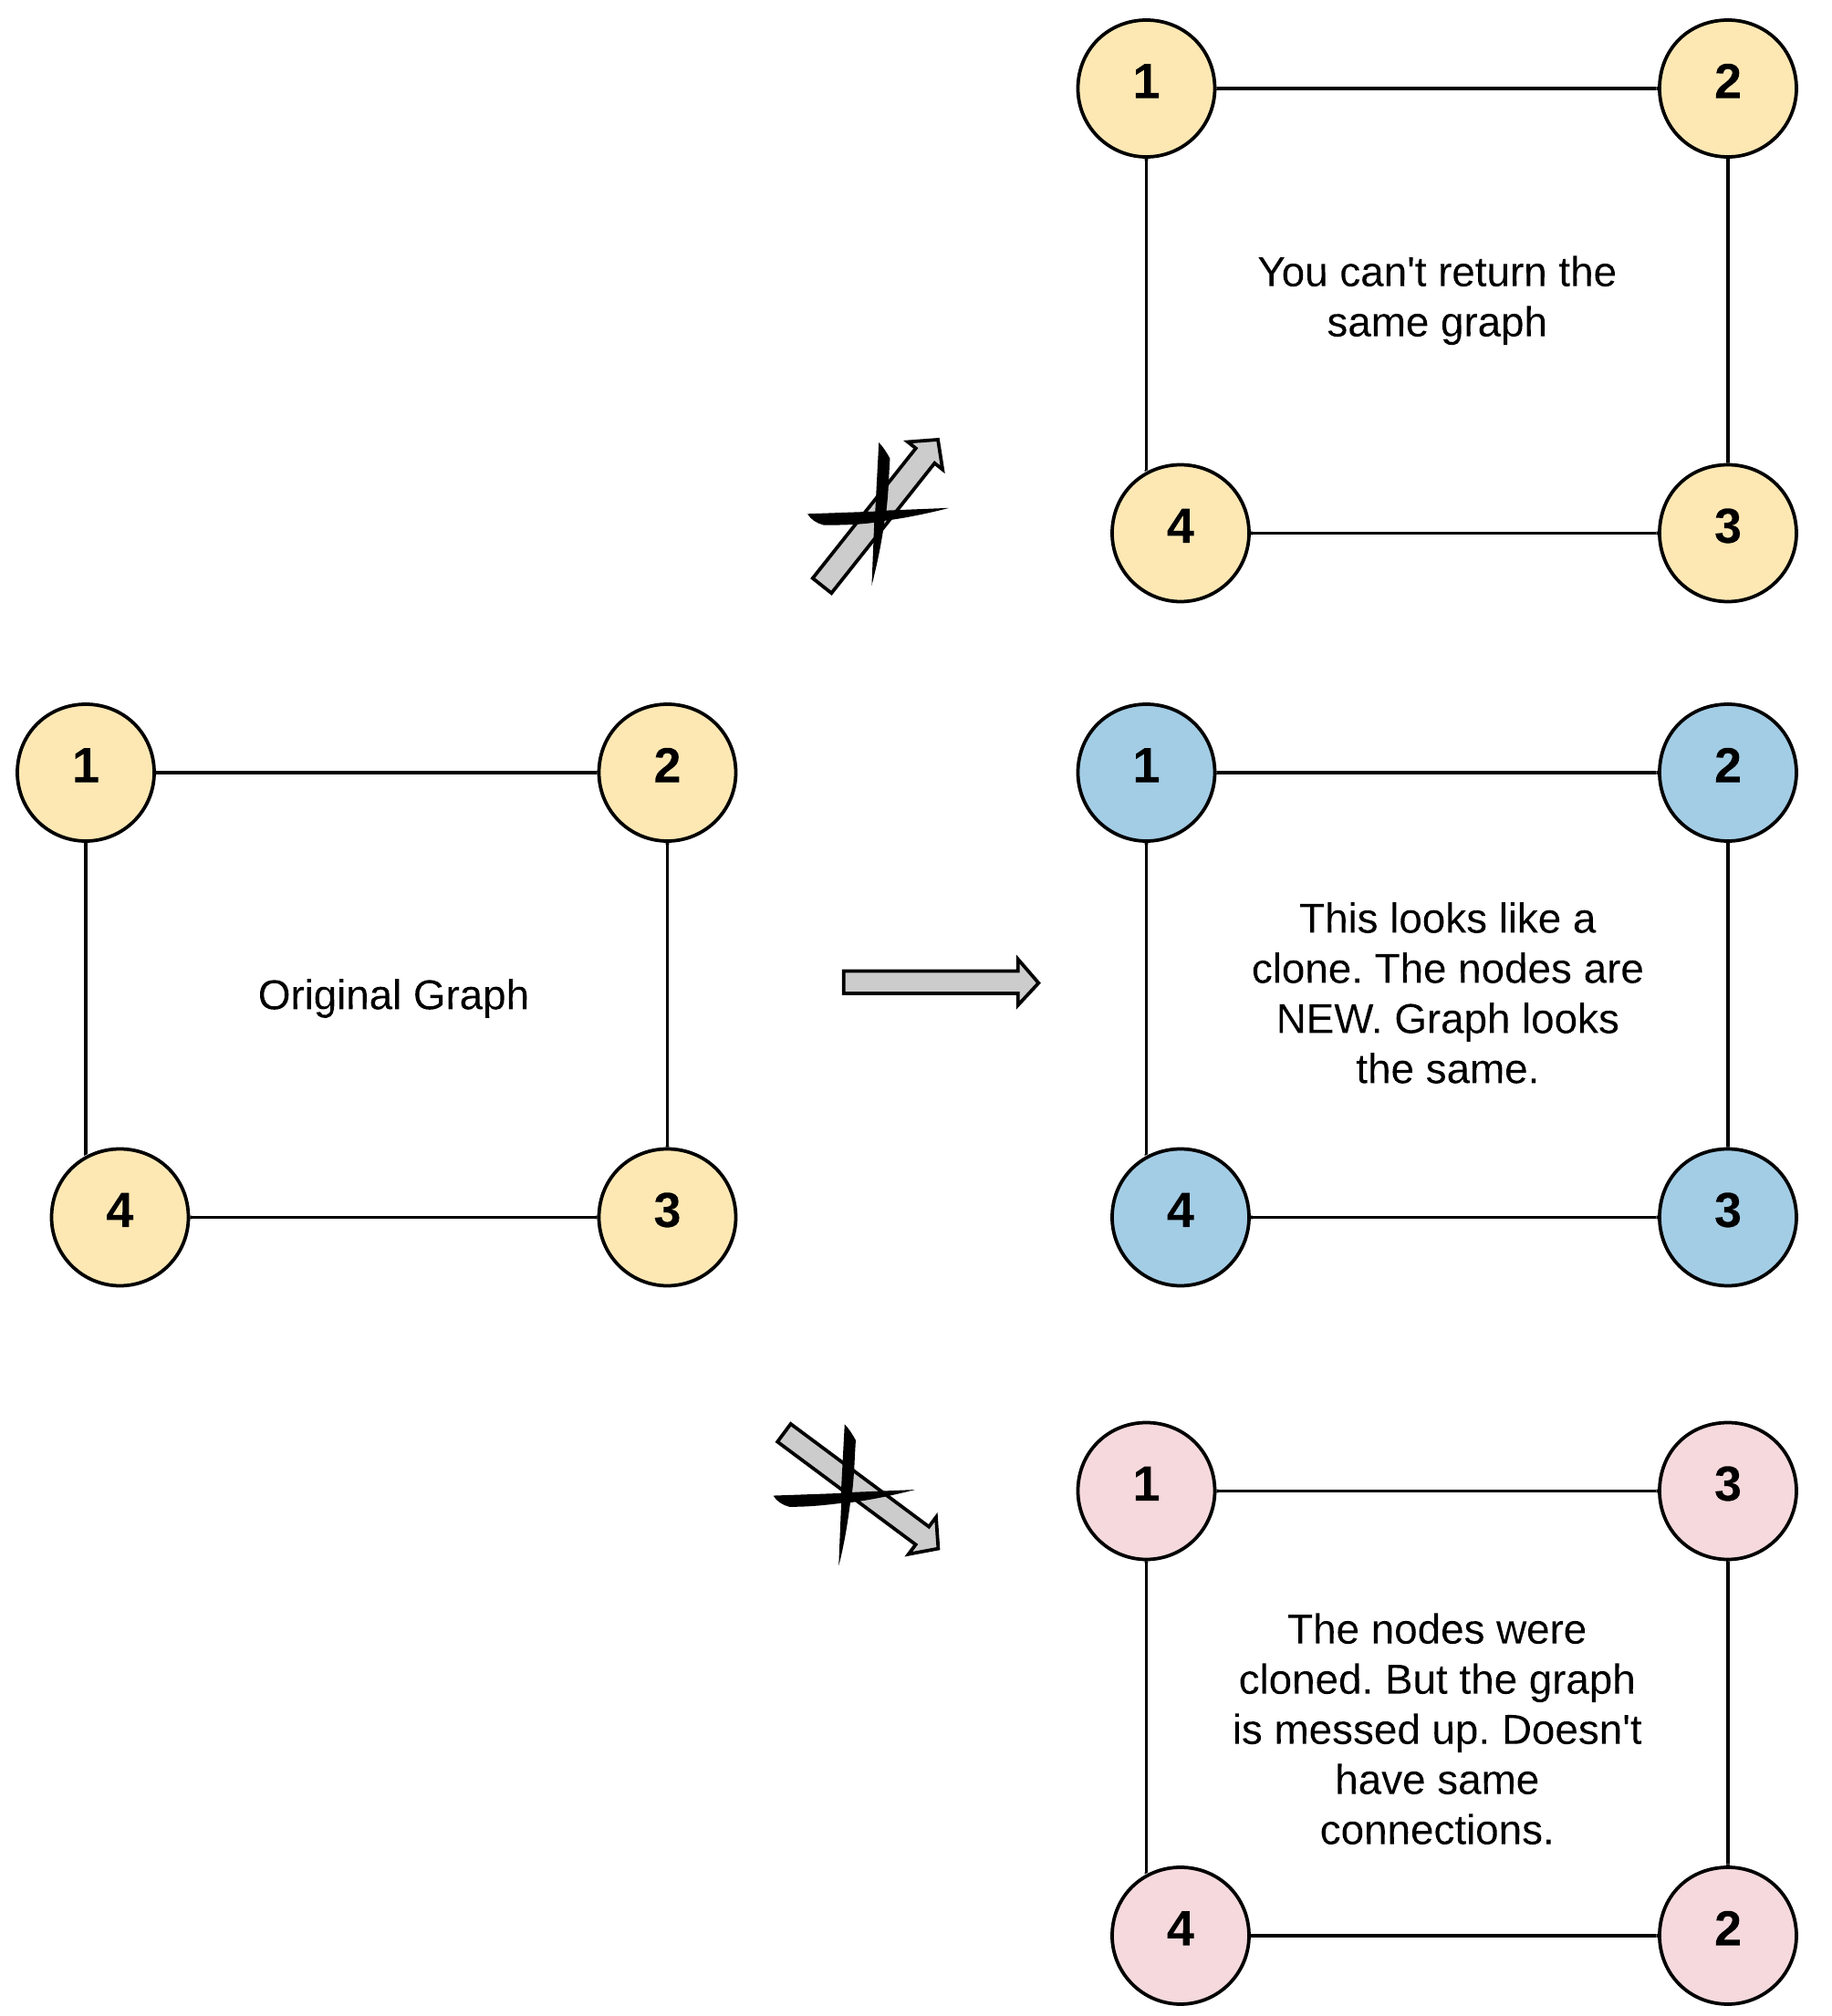

In [ ]:
"""
# Definition for a Node.
class Node(object):
    def __init__(self, val, neighbors):
        self.val = val
        self.neighbors = neighbors
"""
class Solution(object):

    def __init__(self):
        # Dictionary to save the visited node and it's respective clone
        # as key and value respectively. This helps to avoid cycles.
        self.visited = {}

    def cloneGraph(self, node):
        """
        :type node: Node
        :rtype: Node
        """
        if not node:
            return node

        # If the node was already visited before.
        # Return the clone from the visited dictionary.
        if node in self.visited:
            return self.visited[node]

        # Create a clone for the given node.
        # Note that we don't have cloned neighbors as of now, hence [].
        clone_node = Node(node.val, [])

        # The key is original node and value being the clone node.
        self.visited[node] = clone_node

        # Iterate through the neighbors to generate their clones
        # and prepare a list of cloned neighbors to be added to the cloned node.
        if node.neighbors:
            clone_node.neighbors = [self.cloneGraph(n) for n in node.neighbors]

        return clone_node

In [ ]:
"""
# Definition for a Node.
class Node(object):
    def __init__(self, val, neighbors):
        self.val = val
        self.neighbors = neighbors
"""
from collections import deque
class Solution(object):

    def cloneGraph(self, node):
        """
        :type node: Node
        :rtype: Node
        """

        if not node:
            return node

        # Dictionary to save the visited node and it's respective clone
        # as key and value respectively. This helps to avoid cycles.
        visited = {}

        # Put the first node in the queue
        queue = deque([node])
        # Clone the node and put it in the visited dictionary.
        visited[node] = Node(node.val, [])

        # Start BFS traversal
        while queue:
            # Pop a node say "n" from the from the front of the queue.
            n = queue.popleft()
            # Iterate through all the neighbors of the node
            for neighbor in n.neighbors:
                if neighbor not in visited:
                    # Clone the neighbor and put in the visited, if not present already
                    visited[neighbor] = Node(neighbor.val, [])
                    # Add the newly encountered node to the queue.
                    queue.append(neighbor)
                # Add the clone of the neighbor to the neighbors of the clone node "n".
                visited[n].neighbors.append(visited[neighbor])

        # Return the clone of the node from visited.
        return visited[node]

You are given a list of airline tickets where tickets[i] = [fromi, toi] represent the departure and the arrival airports of one flight. Reconstruct the itinerary in order and return it.

All of the tickets belong to a man who departs from "JFK", thus, the itinerary must begin with "JFK". If there are multiple valid itineraries, you should return the itinerary that has the smallest lexical order when read as a single string.

For example, the itinerary ["JFK", "LGA"] has a smaller lexical order than ["JFK", "LGB"].
You may assume all tickets form at least one valid itinerary. You must use all the tickets once and only once.

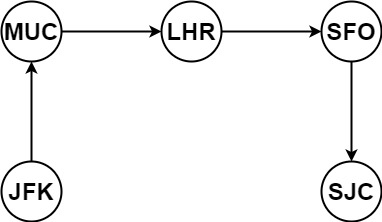


Input: tickets = [["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]]
Output: ["JFK","MUC","LHR","SFO","SJC"]

In [ ]:
class Solution(object):
    """  """
    def findItinerary(self, tickets):
        targets = collections.defaultdict(list)
        print(sorted(tickets)[::-1])
        for a, b in sorted(tickets)[::-1]:
            targets[a] += b,
        route = []
        print(targets)
        
        def visit(airport):
            print(airport)
            while targets[airport]:
                visit(targets[airport].pop())
            route.append(airport)
        visit('JFK')
        print(route)
        return route[::-1]

In [ ]:
class Solution(object):
    def findItinerary(self, tickets):
        """
        :type tickets: List[List[str]]
        :rtype: List[str]
        """
        from collections import defaultdict
        self.flightMap = defaultdict(list)

        for ticket in tickets:
            origin, dest = ticket[0], ticket[1]
            self.flightMap[origin].append(dest)

        # sort the itinerary based on the lexical order
        for origin, itinerary in self.flightMap.items():
        # Note that we could have multiple identical flights, i.e. same origin and destination.
            itinerary.sort(reverse=True)

        self.result = []
        self.DFS('JFK')

        # reconstruct the route backwards
        return self.result[::-1]

    def DFS(self, origin):
        destList = self.flightMap[origin]
        while destList:
            #while we visit the edge, we trim it off from graph.
            nextDest = destList.pop()
            self.DFS(nextDest)
        self.result.append(origin)

In [ ]:
class Solution:
    def validPath(self, n: int, edges: List[List[int]], start: int, end: int) -> bool:
        neighbors = defaultdict(list)
        for n1, n2 in edges:
            neighbors[n1].append(n2)
            neighbors[n2].append(n1)
            
        def dfs(node, end, seen):
            if node == end:
                return True
            if node in seen:
                return False
            
            seen.add(node)
            for n in neighbors[node]:
                if dfs(n, end, seen):
                    return True
                
            return False
        
        seen = set()    
        return dfs(start, end, seen)

You are given a perfect binary tree where all leaves are on the same level, and every parent has two children. The binary tree has the following definition:

struct Node {

int val;

Node *left;

Node *right;

Node *next;

}

Populate each next pointer to point to its next right node. If there is no next right node, the next pointer should be set to NULL.

Initially, all next pointers are set to NULL.

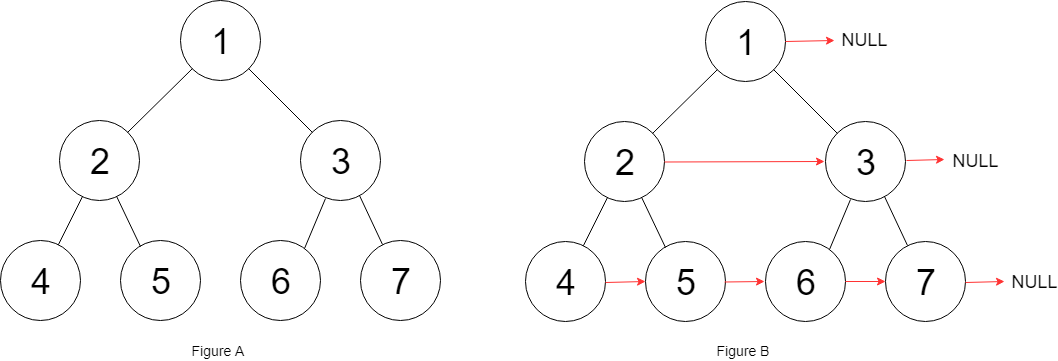

In [ ]:
def connect1(self, root):
    if root and root.left and root.right:
        root.left.next = root.right
        if root.next:
            root.right.next = root.next.left
        self.connect(root.left)
        self.connect(root.right)
 
# BFS       
def connect2(self, root):
    if not root:
        return 
    queue = [root]
    while queue:
        curr = queue.pop(0)
        if curr.left and curr.right:
            curr.left.next = curr.right
            if curr.next:
                curr.right.next = curr.next.left
            queue.append(curr.left)
            queue.append(curr.right)
    
# DFS 
def connect(self, root):
    if not root:
        return 
    stack = [root]
    while stack:
        curr = stack.pop()
        if curr.left and curr.right:
            curr.left.next = curr.right
            if curr.next:
                curr.right.next = curr.next.left
            stack.append(curr.right)
            stack.append(curr.left)

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

 

Example 1:

Input: grid = [

  ["1","1","1","1","0"],

["1","1","0","1","0"],

["1","1","0","0","0"],

["0","0","0","0","0"]

]

Output: 1

In [ ]:
class Solution:
    def numIslands(self, grid):
        if not grid:
            return 0

        count = 0
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '1':
                    self.dfs(grid, i, j)
                    count += 1
        return count

    def dfs(self, grid, i, j):
        if i<0 or j<0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j] != '1':
            return
        grid[i][j] = '#'
        self.dfs(grid, i+1, j)
        self.dfs(grid, i-1, j)
        self.dfs(grid, i, j+1)
        self.dfs(grid, i, j-1)

#### Breadth first search

In [ ]:
def validPath(self, n: int, edges: List[List[int]], start: int, end: int) -> bool:
        neighbors = defaultdict(list)
        for n1, n2 in edges:
            neighbors[n1].append(n2)
            neighbors[n2].append(n1)
            
        q = deque([start])
        seen = set([start])
        while q:
            node = q.popleft()            
            if node == end:
                return True            
            for n in neighbors[node]:
                if n not in seen:
                    seen.add(n)
                    q.append(n)
                
        return False

In [ ]:
from collections import deque
from pprint import pprint
        
class Solution:
    def wallsAndGates(self, rooms: List[List[int]]) -> None:
        empty = 2147483647
        gate = 0
        # steps taken in all four directions
        directions = [[1,0],
                   [-1,0],
                   [0,1],
                   [0,-1]]
        #pprint(rooms)
        row = len(rooms)
        
        if row == 0: return
        
        col = len(rooms[0])
        
        que = deque([])
        
        for i in range(row):
            for j in range(col):
                if rooms[i][j] == gate:
                    que.append([i,j])
                    
        # implemention BFS using queue FIFO
        while que:
            #print(que)
            vertex = que.popleft() #FIFO
            for d in directions:
                r = vertex[0] + d[0]
                c = vertex[1] + d[1]
                
                # check for matrix out of bound and not empty spaces
                if r < 0 or c < 0 or r >= row or c >= col or rooms[r][c] != empty:
                    continue
                # continue keyword skips the code below and iterate
                rooms[r][c] = rooms[vertex[0]][vertex[1]] + 1
                que.append([r, c])

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

All the visited cells of the path are 0.
All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).
The length of a clear path is the number of visited cells of this path.

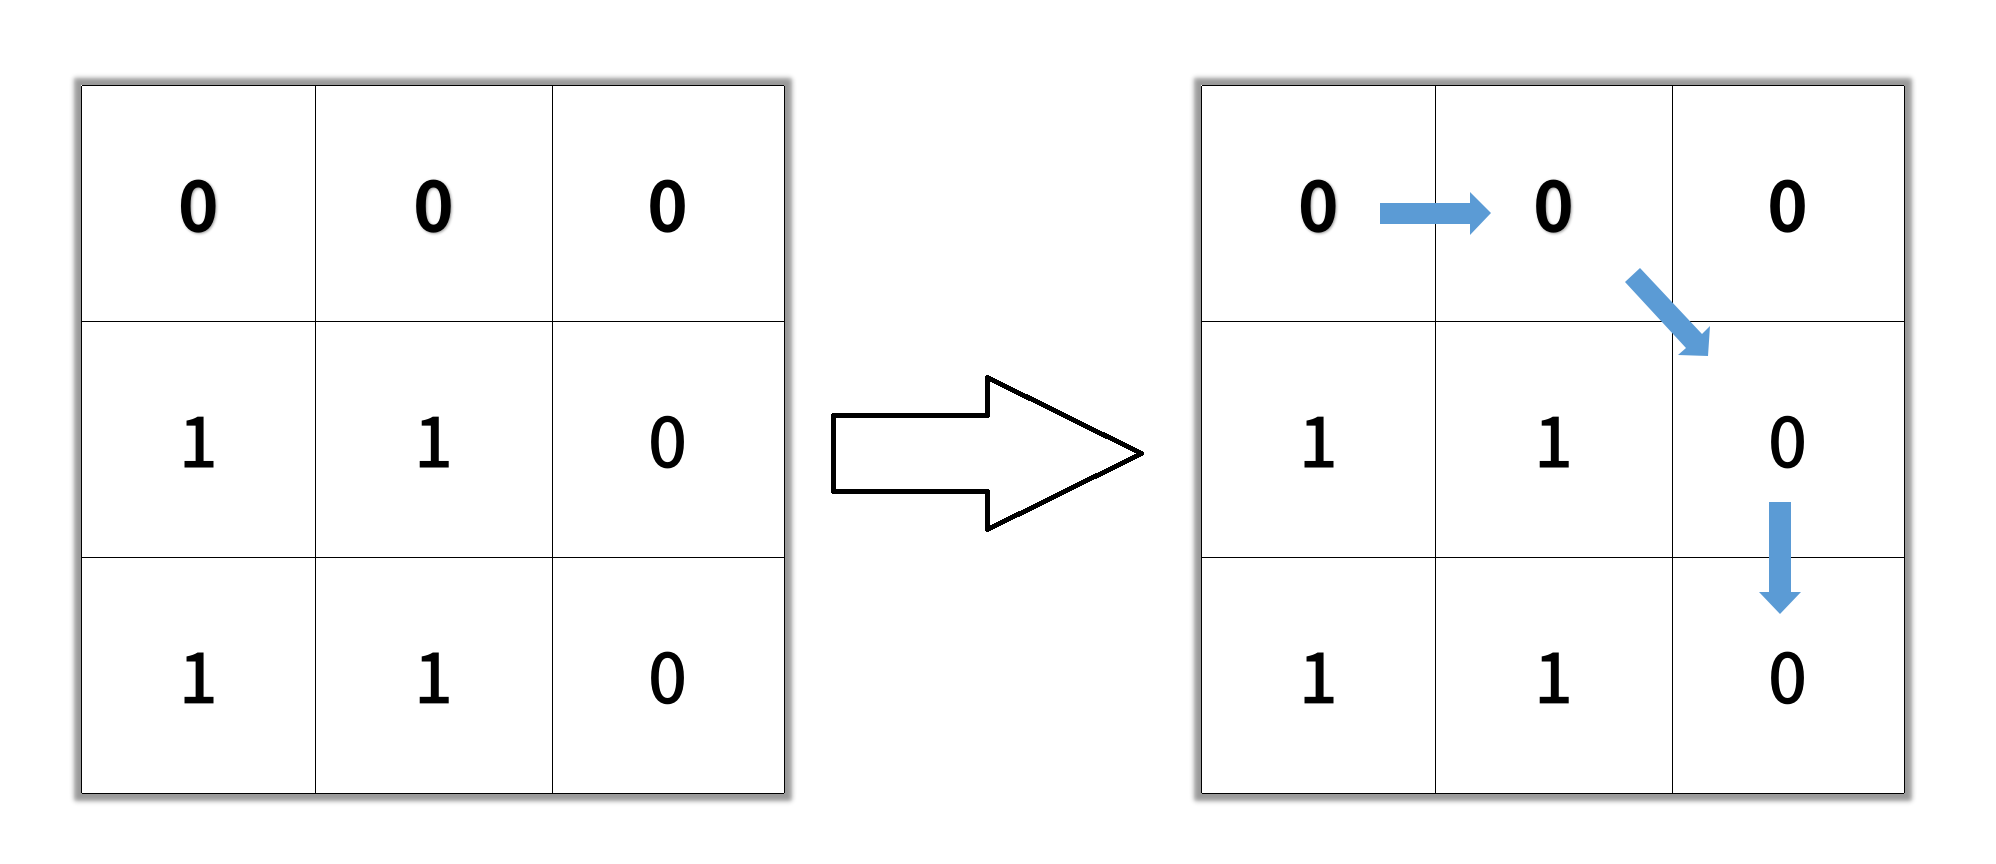

Input: 
grid = [[0,0,0],[1,1,0],[1,1,0]]

Output: 4

In [ ]:
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open. 
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque()
        queue.append((0, 0))
        grid[0][0] = 1 
        
        # Carry out the BFS.
        while queue:
            row, col = queue.popleft()
            distance = grid[row][col]
            if (row, col) == (max_row, max_col):
                print(grid)
                return distance
            for neighbour_row, neighbour_col in get_neighbours(row, col):
                grid[neighbour_row][neighbour_col] = distance + 1
                queue.append((neighbour_row, neighbour_col))
        
        # There was no path.
        return -1        

### Arrays

In [2]:
# converts the given string into a signed 32-bit integer.

def myAtoi(s: str) -> int:
        INT_MAX = pow(2,31) - 1 
        INT_MIN = -pow(2,31)
        
        ans, n = 0, len(s)
        founddigits = False
        positive = True
        
        # Read leading space
        i = 0
        while i<n and s[i]==' ':
            i += 1
        
        # Read sign
        if i<n and s[i] in '+-':
            positive = s[i] == '+'
            i += 1
        
        # Read digits
        while i<len(s) and s[i].isdigit():
            ans = 10*ans + int(s[i])
            i += 1
            
        return min(INT_MAX, ans) if positive else max(INT_MIN, -ans)

In [5]:
# if larger number on right we subtract from number on left otherwise always add
# example : IX is 10-1 = 9, and XI is 10+1 = 11
values = {
    "I": 1,
    "V": 5,
    "X": 10,
    "L": 50,
    "C": 100,
    "D": 500,
    "M": 1000,
}

class Solution:
    def romanToInt(self, s: str) -> int:
        total = values.get(s[-1])
        for i in reversed(range(len(s) - 1)):
            if values[s[i]] < values[s[i + 1]]:
                total -= values[s[i]]
            else:
                total += values[s[i]]
        return total

#### three sum problem

In [ ]:
def threeSum(self, nums: List[int]) -> List[List[int]]:

	res = set()

	#1. Split nums into three lists: negative numbers, positive numbers, and zeros
	n, p, z = [], [], []
	for num in nums:
		if num > 0:
			p.append(num)
		elif num < 0: 
			n.append(num)
		else:
			z.append(num)

	#2. Create a separate set for negatives and positives for O(1) look-up times
	N, P = set(n), set(p)

	#3. If there is at least 1 zero in the list, add all cases where -num exists in N and num exists in P
	#   i.e. (-3, 0, 3) = 0
	if z:
		for num in P:
			if -1*num in N:
				res.add((-1*num, 0, num))

	#3. If there are at least 3 zeros in the list then also include (0, 0, 0) = 0
	if len(z) >= 3:
		res.add((0,0,0))

	#4. For all pairs of negative numbers (-3, -1), check to see if their complement (4)
	#   exists in the positive number set
	for i in range(len(n)):
		for j in range(i+1,len(n)):
			target = -1*(n[i]+n[j])
			if target in P:
				res.add(tuple(sorted([n[i],n[j],target])))

	#5. For all pairs of positive numbers (1, 1), check to see if their complement (-2)
	#   exists in the negative number set
	for i in range(len(p)):
		for j in range(i+1,len(p)):
			target = -1*(p[i]+p[j])
			if target in N:
				res.add(tuple(sorted([p[i],p[j],target])))

	return res

#### next permutation

def next_permutation(nums: list) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        i = len(nums) -1
        
        while i > 0 and nums[i-1] >= nums[i]:
            i -=1
            
        if i <= 0:
            nums[:] = nums[::-1]
        else:
            j = len(nums)-1

            while nums[j] <= nums[i-1]:
                j -=1

            nums[i-1], nums[j] = nums[j], nums[i-1]

            nums[i:] = nums[len(nums)-1: i-1 : -1]
        return nums

In [22]:
arr = [0, 3, 3, 5, 8]
next_permutation(arr)

[0, 3, 3, 8, 5]

In [31]:
import collections
def groupAnagrams(strs):
        ans = collections.defaultdict(list)
        for s in strs:
            ans[tuple(sorted(s))].append(s)
        return list(ans.values())

In [32]:
strs = ["are", "bat", "ear", "code", "tab", "era"]

groupAnagrams(strs)

[['are', 'ear', 'era'], ['bat', 'tab'], ['code']]

#### minimum window substring

In [37]:
import collections

def minWindow(s: str, t: str):
    # check if t is not empty
    if t == "": return ""
    
    # count the number of characters in t
    countT = collections.Counter(t)
    # initiate the empty window dictionary for mapping
    window = {}
    # initiate the what we have and vs needed characters count
    have, need = 0, len(countT)
    res, resLen = [-1,-1], float('infinity')
    l = 0
    # for loop to scan through the string s
    for r in range(len(s)):
        # add each character to window map dictionary
        window[s[r]] = 1 + window.get(s[r], 0)
        
        # if scanned is the one we need in window as given in t
        if s[r] in countT and window[s[r]] == countT[s[r]]:
            have += 1
        
        # when have and needed characters become equal
        while have == need:
            # update the results
            if (r-l+1) < resLen:
                resLen = r-l+1
                res = [l,r]
            
            # move window from left side to get minimum window while checking for the have == need
            window[s[l]] -=1
            # if windows character count decreses from required as mentioned on the countT
            if s[l] in countT and window[s[l]] < countT[s[l]]:
                have -=1
            l+=1 # move pointer to left
    # store the value of l and r pointers
    l, r = res
    return s[l:r+1]

##### exactly one edit in s to get same string as t (add, delete or replace)

In [38]:
def isOneEditDistance(s: str, t: str) -> bool:
        if abs(len(s) - len(t)) > 1 or s == t:
            return False
        
        i = j = 0
        notEqual = False
        
        while i < len(s) and j < len(t):
            if s[i] == t[j]:
                i += 1
                j += 1
            else:
                if notEqual:
                    return False
                notEqual = True
                if len(s) <= len(t):
                    j += 1
                if len(s) >= len(t):
                    i += 1
            
        return True

#### Product of Array Except Self
    Given an integer array nums,
    return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

In [ ]:
def productExceptSelf(nums: list) -> list:
        length = len(nums)
        result = [1] * length
        result [0] = 1
        for i in range(1, length):
            result[i] = result[i-1]*nums[i-1]
        
        factor = 1
        for i in range(length-1, -1, -1):
            result[i]  = result[i] * factor
            factor *= nums[i]
            
        return result

####   Longest Substring with At Most K Distinct Characters

In [51]:
def lengthOfLongestSubstringKDistinct(s: str, k: int) -> int:
        n = len(s)
        if n * k == 0:
            return 0

        # sliding window left and right pointers
        left, right = 0, 0
        # hashmap character -> its rightmost position
        # in the sliding window
        hashmap = defaultdict()

        max_len = 1

        while right < n:
            # add new character and move right pointer
            hashmap[s[right]] = right
            right += 1

            if len(hashmap) == k + 1:
                # delete the leftmost character
                del_idx = min(hashmap.values())
                del hashmap[s[del_idx]]
                # move left pointer of the slidewindow
                left = del_idx + 1

            max_len = max(max_len, right - left)

        return max_len

In [53]:
class Solution:
    def validate_IPv4(self, IP: str) -> str:
        nums = IP.split('.')
        for x in nums:
            # Validate integer in range (0, 255):
            # 1. length of chunk is between 1 and 3
            if len(x) == 0 or len(x) > 3:
                return "Neither"
            # 2. no extra leading zeros
            # 3. only digits are allowed
            # 4. less than 255
            if x[0] == '0' and len(x) != 1 or not x.isdigit() or int(x) > 255:
                return "Neither"
        return "IPv4"
    
    def validate_IPv6(self, IP: str) -> str:
        nums = IP.split(':')
        hexdigits = '0123456789abcdefABCDEF'
        for x in nums:
            # Validate hexadecimal in range (0, 2**16):
            # 1. at least one and not more than 4 hexdigits in one chunk
            # 2. only hexdigits are allowed: 0-9, a-f, A-F
            if len(x) == 0 or len(x) > 4 or not all(c in hexdigits for c in x):
                return "Neither"
        return "IPv6"
        
    def validIPAddress(self, IP: str) -> str:
        if IP.count('.') == 3:
            return self.validate_IPv4(IP)
        elif IP.count(':') == 7:
            return self.validate_IPv6(IP)
        else:
            return "Neither"

In [ ]:
#### after removing 1 character


def validPalindrome(s: str) -> bool:
    def check_palindrome(s, i, j):
        while i < j:
            if s[i] != s[j]:
                return False
            i += 1
            j -= 1

        return True

    i = 0
    j = len(s) - 1
    while i < j:
        # Found a mismatched pair - try both deletions
        if s[i] != s[j]:
            return check_palindrome(s, i, j - 1) or check_palindrome(s, i + 1, j)
        i += 1
        j -= 1

    return True